### **Chapter 3: Convolution and Frequency Domain Filtering**

#### Giới thiệt thuật toán Low-pass filter (LPF): 
Bộ lọc thông thấp chỉ cho phép các tần số thấp từ biểu diễn miền tần số của ảnh (thu được bằng phép biến đổi Fourier rời rạc, DFT) và chặn tất cả các tần số cao vượt quá một giá trị cắt (cut-off). Ảnh sau đó được tái tạo bằng phép biến đổi Fourier ngược, và vì các thành phần tần số cao tương ứng với các cạnh, chi tiết, nhiễu và các yếu tố khác, LPF có xu hướng loại bỏ chúng.

---

#### 1. LPF with fourier_gaussian

##### 1.1 Import các thư viện cần thiết

In [2]:
from PIL import Image
from skimage.io import imread
from scipy import ndimage
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft as fp
import numpy

##### 1.2 Áp dụng LPF cho ảnh với fourirer_gaussian

In [ ]:
im = np.mean(imread('input/lena.jpg'), axis=2)
freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)

- im = np.mean(imread('lena.jpg'), axis=2): đọc ảnh và chuyển đổi sang ảnh xám (grayscale).
- freq = fp.fft2(im): chuyển ảnh từ không gian không gian (pixel) sang không gian tần số. Kết quả là một mảng 2D chứa các thành phần tần số của ảnh.
- freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4): hàm fourier_gaussian từ thư viện scipy.ndimage áp dụng một bộ lọc Gaussian vào không gian tần số của ảnh, giúp giảm các tần số cao (chi tiết nhỏ) trong ảnh
- im1 = fp.ifft2(freq_gaussian): chuyển ảnh từ không gian tần số trở lại miền không hian. Kết quả là ảnh sau khi đã áp dụng bộ lọc Gaussian.

##### 1.3 Hiển thị kết quả

<Figure size 640x480 with 0 Axes>

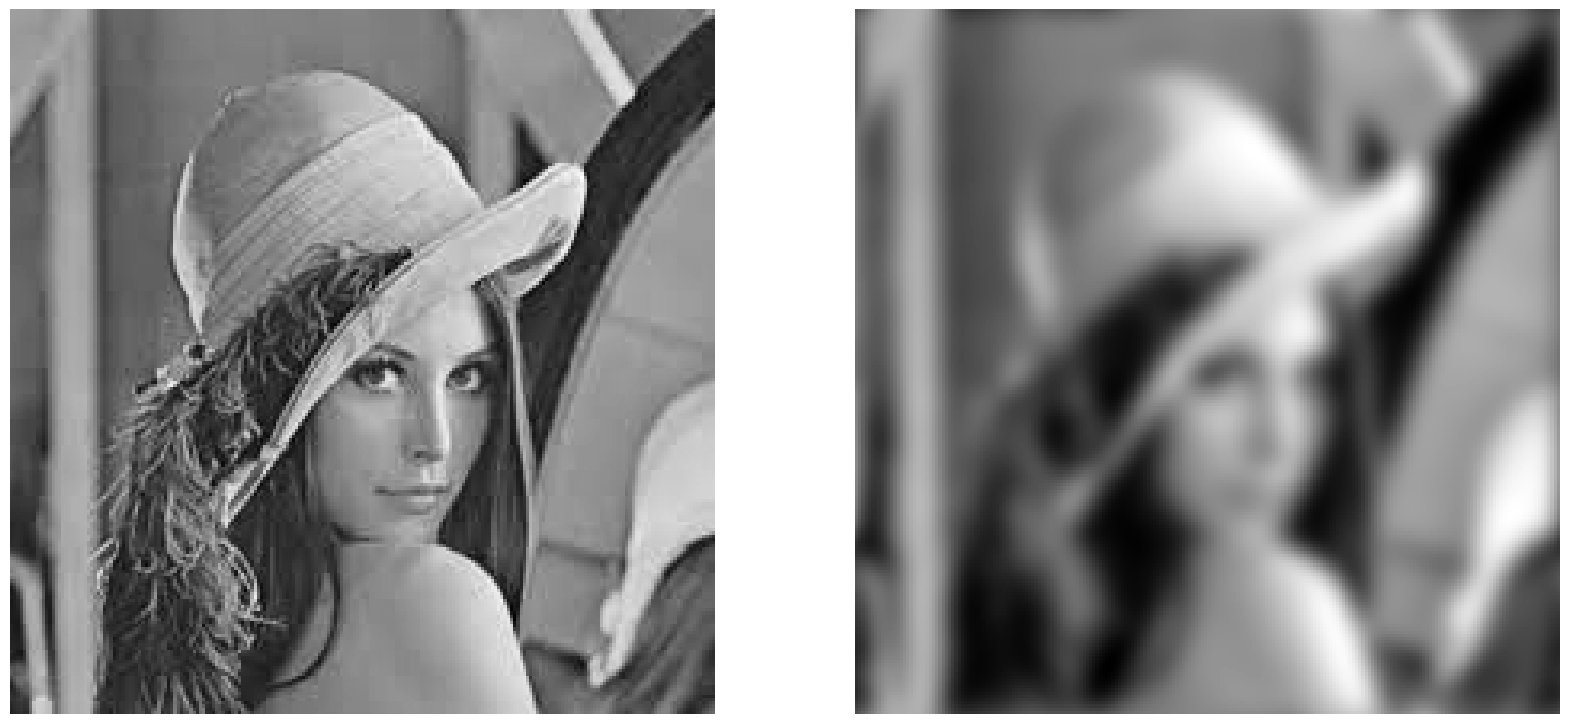

In [17]:
pylab.gray()
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
axes1.imshow(im), axes1.axis('off'), axes2.imshow(im1.real) # the imaginary part is an artifact
axes2.axis('off')
pylab.show()

- pylab.gray(): Chuyển chế độ hiển thị ảnh sang grayscale (màu xám).
- fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10)): Tạo một figure với 2 subplot, mỗi subplot có kích thước 20x10 inch. axes1 và axes2 là các trục (axes) của các subplot này.
- axes1.imshow(im): Hiển thị ảnh gốc (im) trên subplot đầu tiên.
- axes2.imshow(im1.real): Hiển thị ảnh sau khi áp dụng bộ lọc Gaussian (im1.real) trên subplot thứ hai. 
    - im1.real được sử dụng để lấy phần thực của ảnh (bởi vì ảnh trong không gian tần số có thể có phần ảo, nhưng phần ảo này là một artifact và không cần thiết cho việc hiển thị).
- axes1.axis('off') và axes2.axis('off'): Tắt các trục (axis) trên các subplot để chỉ hiển thị ảnh mà không có vạch trục.

##### 1.4 Hiển thị phổ tần số sau khi áp dụng bộ lọc Gaussian

C:\Users\Admin\AppData\Local\Temp\ipykernel_12884\706543968.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  numpy.fft.fftshift(freq_gaussian))).astype(int))


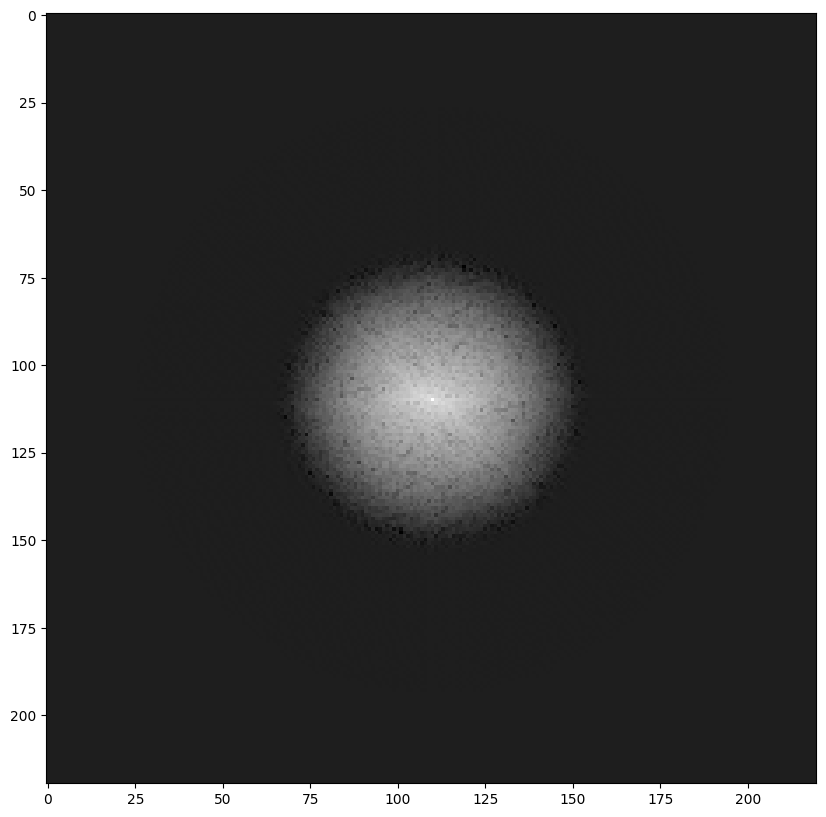

In [18]:
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 +
numpy.fft.fftshift(freq_gaussian))).astype(int))
pylab.show()

- pylab.figure(figsize=(10,10)): Tạo một figure mới có kích thước 10x10 inch.
- numpy.fft.fftshift(freq_gaussian): Hàm fftshift dịch chuyển phổ tần số về giữa của ảnh
- 0.1 + numpy.fft.fftshift(freq_gaussian): Thêm một giá trị nhỏ 0.1 vào phổ tần số để tránh lỗi logarit khi tính logarit của các giá trị nhỏ hoặc âm trong phổ tần số.
- 20 * np.log10(...): Nhân với 20 để chuyển đổi từ logarit theo cơ số 10 sang thang đo dB (decibel), vì phổ tần số thường được biểu diễn dưới dạng dB trong xử lý tín hiệu.
- .astype(int): Chuyển đổi các giá trị sau khi tính toán thành kiểu int.
- pylab.imshow(...): Hiển thị dữ liệu dưới dạng ảnh.

#### 2. LPF with scipy fftpack

##### 2.1 Import thư việm fftpack

In [19]:
from scipy import fftpack

- scipy.fftpack: Thư viện của SciPy cung cấp các hàm để thực hiện các phép toán Fourier như fft2 (hai chiều) và ifft2 (ngược lại).

##### 2.2 Đọc ảnh và chuyển đổi thành ảnh xám

In [4]:
im = np.array(Image.open('input/cameraman.jpg').convert('L'))

- Image.open('cameraman.jpg'): mở ảnh cameraman.jpg.
- .convert('L'): chuyển ảnh về chế độ xám (grayscale).
- np.array(): chuyển đổi ảnh thành một mảng NumPy, mỗi giá trị trong mảng này đại diện cho độ sáng của pixel tại vị trí tương ứng.

##### 2.4 Áp dụng Fourier Transform và tạo bộ lọc thông thấp LPF

In [6]:
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))

- fp.fft2(im): áp dụng phép biến đổi Fourier 2D lên ảnh im, chuyển ảnh từ không gian không gian sang không gian tần số.
- (w, h) = freq.shape: lấy kích thước của tần số.
- half_w, half_h: zác định chỉ số giữa của không gian tần số để có thể áp dụng bộ lọc thông thấp.
- snrs_lp: danh sách dùng để lưu giá trị SNR cho từng bộ lọc.
- ubs = list(range(1, 25)): tạo danh sách các giá trị từ 1 đến 24 để áp dụng làm cutoff frequency cho bộ lọc thông thấp.

##### 2.3 Định nghĩa hàm signaltonoise


In [7]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

- Hàm signaltonoise tính tỷ lệ tín hiệu trên nhiễu (SNR) của một mảng đầu vào a:
    - a.mean(axis): tính giá trị trung bình của mảng theo chiều axis.
    - a.std(axis=axis, ddof=ddof): tính độ lệch chuẩn của mảng theo chiều axis.
    - np.where(sd == 0, 0, m/sd): nếu độ lệch chuẩn là 0, trả về 0. Ngược lại, trả về tỷ lệ tín hiệu trên nhiễu là giá trị trung bình chia cho độ lệch chuẩn.

##### 2.6 Áp dụng bộ lọc thông thấp (Low-Pass Filtering) và tính toán SNR

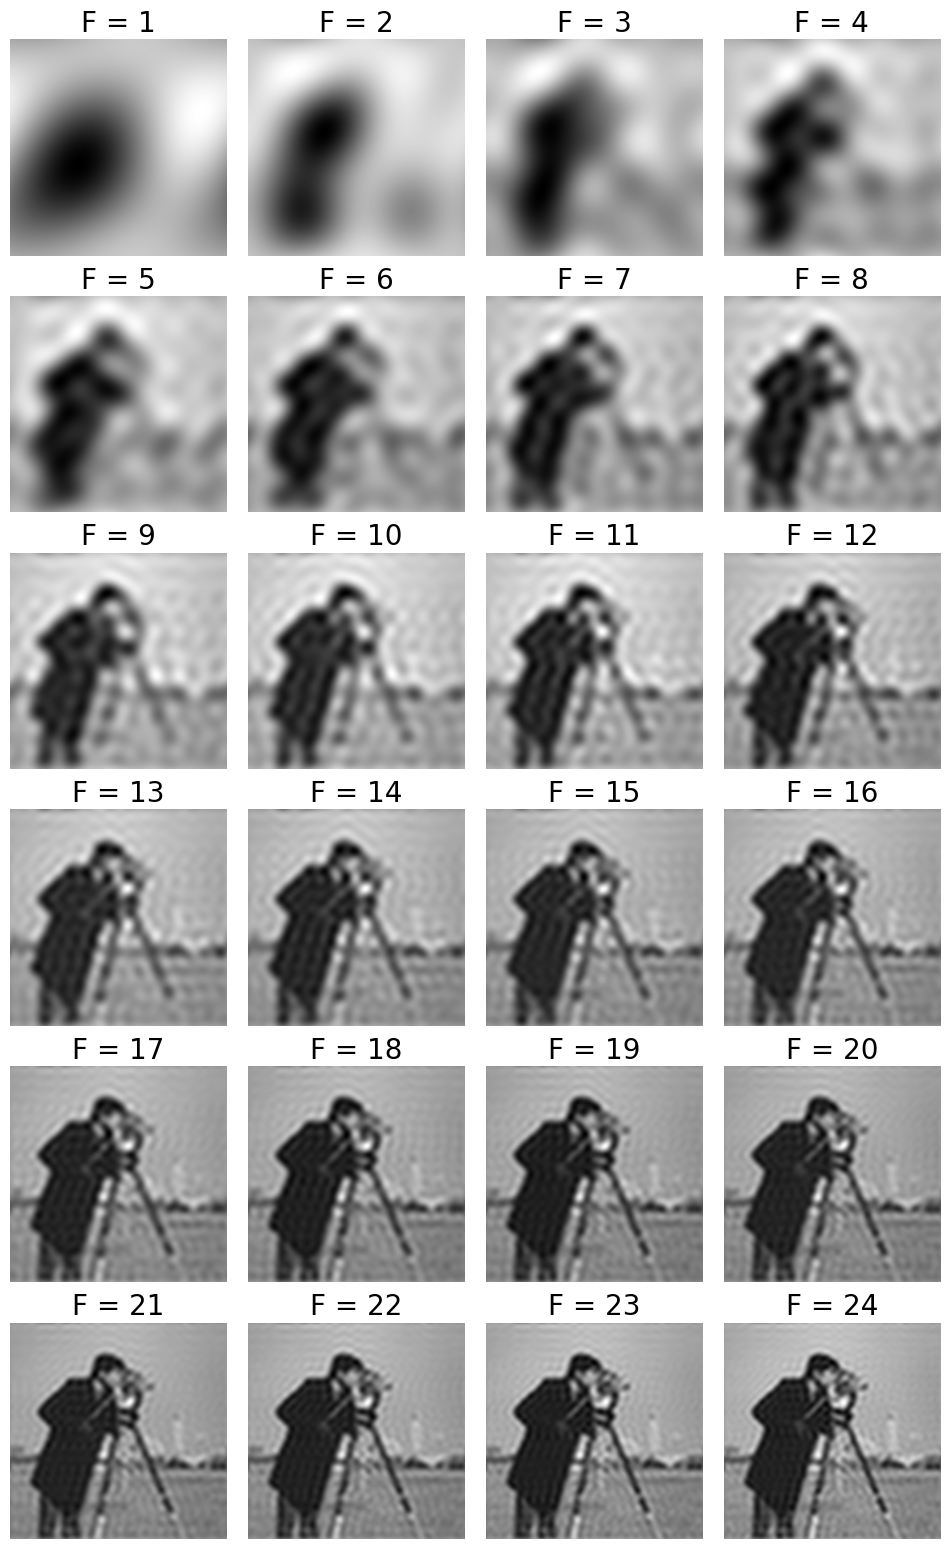

In [8]:
pylab.figure(figsize=(12, 20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
    freq2 -= freq2_low # select only the first 20x20 (low) frequencies
    im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
    snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

- Vòng lặp for u in ubs: Đối với mỗi giá trị u trong danh sách ubs, sẽ áp dụng một bộ lọc thông thấp với cutoff frequency là u.
    - freq1 = np.copy(freq): Tạo một bản sao của không gian tần số gốc.
    - freq2 = fftpack.fftshift(freq1): Dịch chuyển tần số để tần số thấp nhất ở trung tâm ảnh.
    - freq2_low[half_w-u:half_w+u+1, half_h-u:half_h+u+1] = 0: Đặt các tần số thấp (được xác định bởi u) về 0, áp dụng bộ lọc thông thấp.
    - freq2 -= freq2_low: Lọc bỏ tần số thấp khỏi ảnh, giữ lại tần số cao.
    - im1 = fp.ifft2(fftpack.ifftshift(freq2)).real: Chuyển ảnh trở lại không gian không gian bằng cách sử dụng phép biến đổi ngược Fourier.
    - snrs_lp.append(signaltonoise(im1, axis=None)): Tính và lưu giá trị SNR cho ảnh đã lọc.
    - pylab.subplot(6, 4, u): Vẽ biểu đồ cho ảnh đã lọc.
    - pylab.imshow(im1, cmap='gray'): Hiển thị ảnh đã lọc với bảng màu xám.
    - pylab.axis('off'): Tắt hiển thị trục tọa độ.
    - pylab.title('F = ' + str(u), size=20): Đặt tiêu đề cho mỗi ảnh với giá trị cutoff frequency u.
- pylab.subplots_adjust(wspace=0.1, hspace=0): Điều chỉnh khoảng cách giữa các biểu đồ.
- pylab.show(): Hiển thị tất cả các biểu đồ.